# Figure 1, part 2

Removed splicing events in genes with TPM < 1 in Notebook `1.1 Supplementary Figure 1`.

In [1]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-13 08:47:00	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-05-13 08:47:00	Parsing datapackage to create a Study object
2016-05-13 08:47:33	Initializing Study
2016-05-13 08:47:33	Initializing Predictor configuration manager for Study
2016-05-13 08:47:33	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-13 08:47:33	Added ExtraTreesClassifier to default predictors
2016-05-13 08:47:33	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-13 08:47:33	Added ExtraTreesRegressor to default predictors
2016-05-13 08:47:33	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-13 08:47:33	Added GradientBoostingClassifier to default predictors
2016-05-13 08:47:33	Predictor GradientBoostingRegressor is of typ

In [2]:
study.expression.data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [3]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [4]:
# study.metadata._phenotype_to_color = {u'MN': u'#228a44',
#                                      u'NPC': u'#73c476',
#                                      u'iPSC': u'#c7e9c0'}

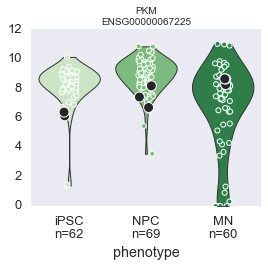

In [5]:
with sns.axes_style('dark'):
    study.plot_gene('PKM', sample_subset='~outlier')
    fig = plt.gcf()
    for ax in fig.axes:
        ax.set(ylim=(0, 12))
    fig.savefig('{}/pkm_violin.pdf'.format(folder))

### Number of splicing events in non-differentially expressed genes

In [6]:
from flotilla.compute.expression import differential_expression


In [7]:
singles_not_outliers = study.expression.singles.loc[~study.expression.singles.index.isin(study.expression.outlier_samples)]
singles_not_outliers.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236017,ENSGR0000236871,ENSGR0000270726
CVN_01,9.583297,0,3.691144,0.000000,0.000000,2.748821,0,1.722466,0,0.000000,...,0.080647,0.291587,1.017003,0.080984,6.998972,0.153573,0.119524,0.663759,0.000000,2.905205
CVN_02,5.338678,0,0.000000,0.000000,0.113387,0.000000,0,0.503710,0,1.451580,...,0.495262,0.000000,0.568696,0.000000,0.000000,0.000000,0.116144,0.000000,0.087565,3.746504
CVN_03,0.146438,0,0.000000,1.262223,0.000000,0.000000,0,0.291712,0,0.000000,...,0.000000,0.000000,0.330164,0.263555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVN_04,8.422662,0,2.593897,0.000000,0.000000,6.688600,0,8.181010,0,1.155126,...,0.562974,0.000000,0.223287,0.140263,0.195424,0.000000,1.601383,0.000000,0.205765,1.533982
CVN_05,7.531459,0,5.124018,0.262705,4.346173,0.397903,0,6.262296,0,0.614197,...,0.353069,0.000000,0.646603,0.260183,6.631383,0.000000,0.096939,0.166200,0.133075,0.553417


In [8]:
differential_results = differential_expression(singles_not_outliers, groupby=study.sample_id_to_phenotype)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/compute/expression.py:234: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  de_results = de_results.sort('bonferonni_p_value')


In [9]:
differential_results.head()

,gene_id,U_statistic,p_value,bonferonni_p_value
0,ENSG00000234273,180.609954,6.040138e-40,1.123103e-35
1,ENSG00000258417,180.609954,6.040138e-40,1.123103e-35
2,ENSG00000167600,180.609954,6.040138e-40,1.123103e-35
3,ENSG00000249152,180.609954,6.040138e-40,1.123103e-35
4,ENSG00000136110,178.790459,1.500186e-39,2.789447e-35


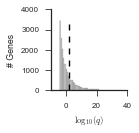

In [10]:
differential_results['log10_bonferonni_p_value'] = -np.log10(differential_results.bonferonni_p_value)

log_p_cutoff = 2

sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(2, 2))
# plt.yscale('log', nonposy='clip')

sns.distplot(differential_results['log10_bonferonni_p_value'], color='grey', kde=False)
ymin, ymax = ax.get_ylim()
ax.locator_params(nbins=4)

ax.vlines(log_p_cutoff, ymin, ymax, linestyle='--')
ax.set(ylabel='# Genes', xlabel='$\log_{10}(q)$')
sns.despine()

fig.tight_layout()
fig.savefig('{}/differential_expression_kruskal_wallis_bonferonni_p_value_cutoff.pdf'.format(folder))

In [11]:
non_de_genes = differential_results.gene_id.loc[differential_results.log10_bonferonni_p_value <= log_p_cutoff]
len(non_de_genes)

13634

### PCA of constitutively expressed genes

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:178: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  self.magnitudes.sort(ascending=False)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:185: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  x.sort(ascending=True)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:514: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  components = components.sort(columns='pc_1', ascending=False)


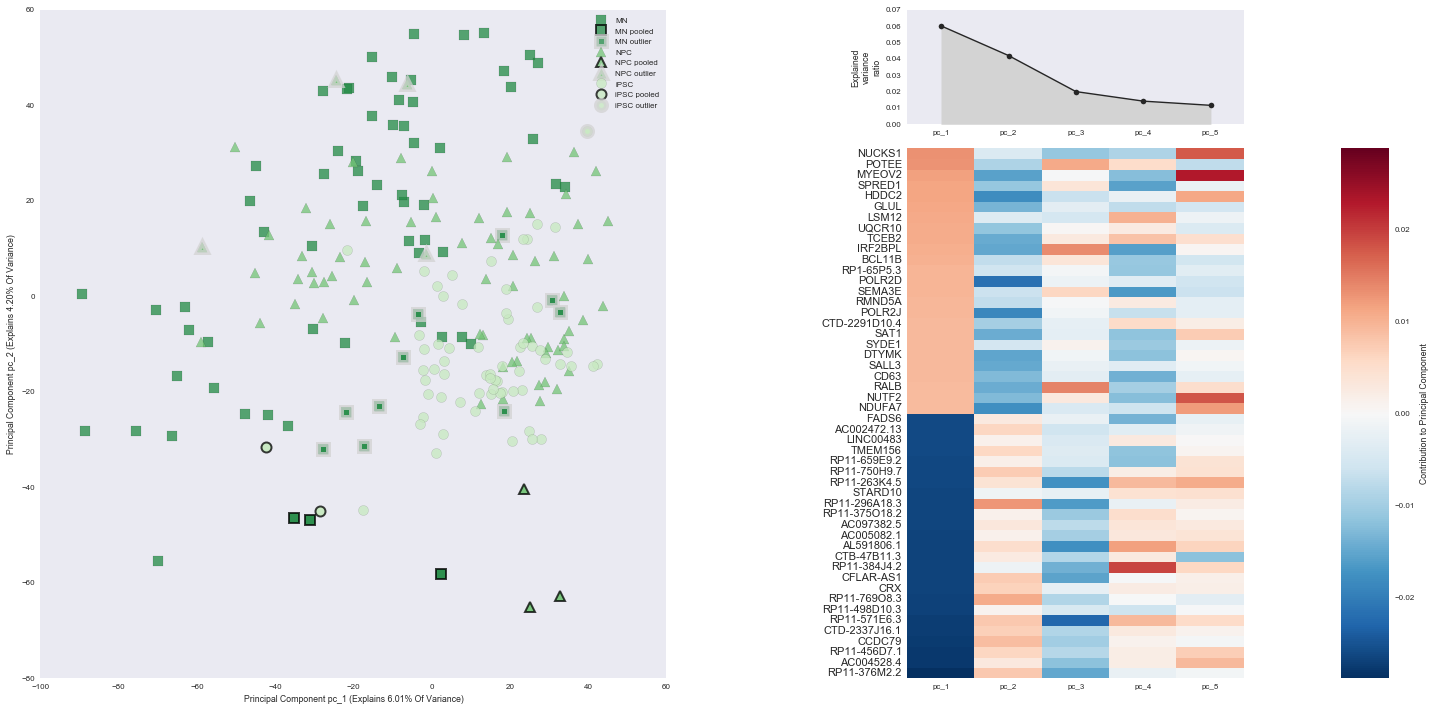

In [12]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_expression_pca.pdf'.format(folder))

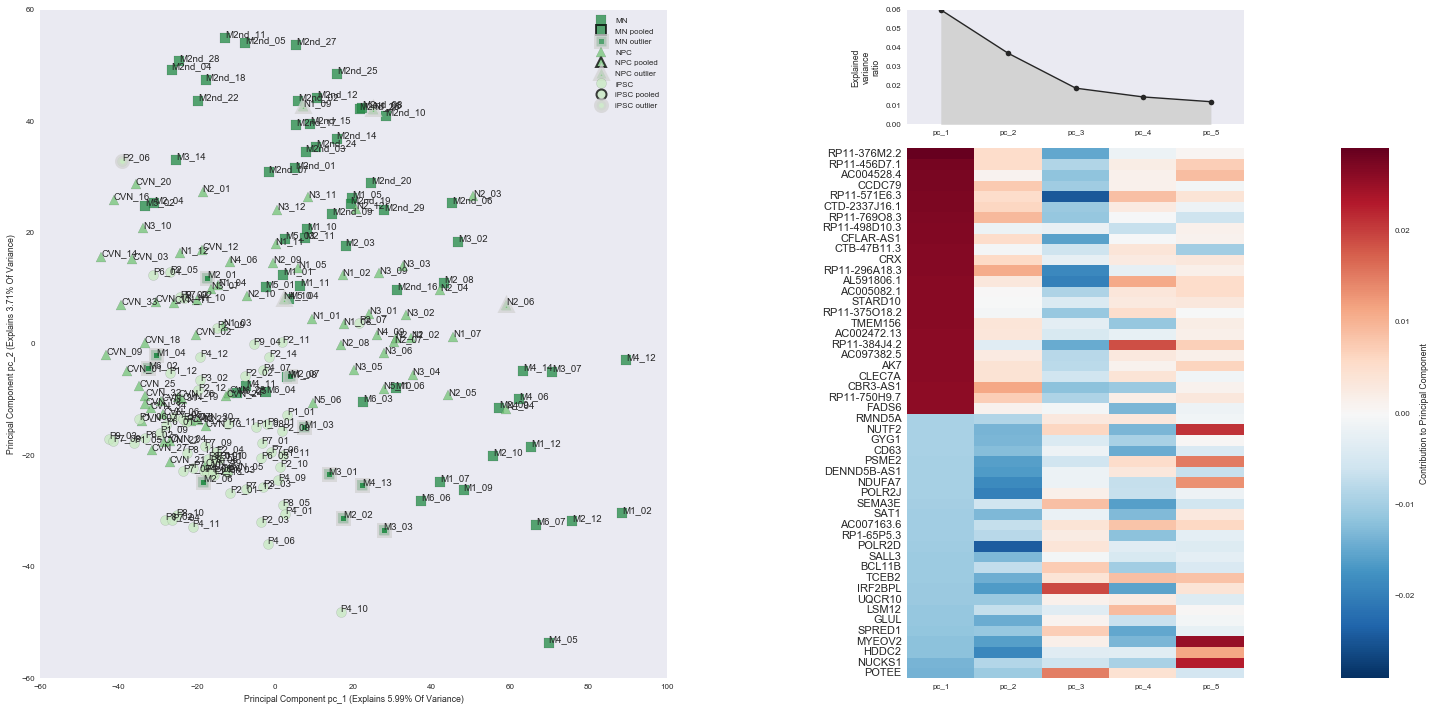

In [13]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False, show_point_labels=True, sample_subset='~pooled')

`M2_12` and `M6_07` are the two motor neuron samples that always stick out

In [14]:
weird_samples = ['M2_12', 'M6_07'] #, 'M1_06', 'M6_03']

In [15]:
study.mapping_stats.data.loc[weird_samples, 'Number of input reads']/1e6

M2_12    13.122227
M6_07    96.759045
Name: Number of input reads, dtype: float64

So it's not a read depth issue...

In [16]:
samples = ['M2_12', 'M6_07']
study.metadata.data['MN_outlier'] = False
study.metadata.data.loc[weird_samples, 'MN_outlier'] = True

In [17]:
mn = study.sample_subset_to_sample_ids('MN')
mn_single = mn.intersection(study.expression.singles.index)
mn_single_not_outlier = mn.difference(study.expression.outliers.index)
len(mn_single_not_outlier)

63

In [18]:
mn_single_not_outlier.isin(samples)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True], dtype=bool)

In [19]:
mn_single_not_outlier_not_weird = mn_single_not_outlier.difference(weird_samples)
mn_single_not_outlier_not_weird

Index([u'M1_01', u'M1_02', u'M1_05', u'M1_06', u'M1_07', u'M1_08', u'M1_09',
       u'M1_10', u'M1_11', u'M1_12', u'M2_03', u'M2_04', u'M2_05', u'M2_08',
       u'M2_09', u'M2_10', u'M2_11', u'M2nd_01', u'M2nd_02', u'M2nd_03',
       u'M2nd_04', u'M2nd_05', u'M2nd_06', u'M2nd_07', u'M2nd_08', u'M2nd_09',
       u'M2nd_10', u'M2nd_11', u'M2nd_12', u'M2nd_13', u'M2nd_14', u'M2nd_15',
       u'M2nd_16', u'M2nd_17', u'M2nd_18', u'M2nd_19', u'M2nd_20', u'M2nd_21',
       u'M2nd_22', u'M2nd_24', u'M2nd_25', u'M2nd_26', u'M2nd_27', u'M2nd_28',
       u'M2nd_29', u'M3_02', u'M3_07', u'M3_14', u'M4_05', u'M4_06', u'M4_11',
       u'M4_12', u'M4_14', u'M5_01', u'M5_02', u'M5_03', u'M5_04', u'M6_03',
       u'M6_04', u'M6_05', u'M6_06'],
      dtype='object')

In [20]:
singles_not_outliers = study.expression.singles.index.difference(study.expression.outliers.index)
singles_not_outliers_not_weird = singles_not_outliers.difference(weird_samples)

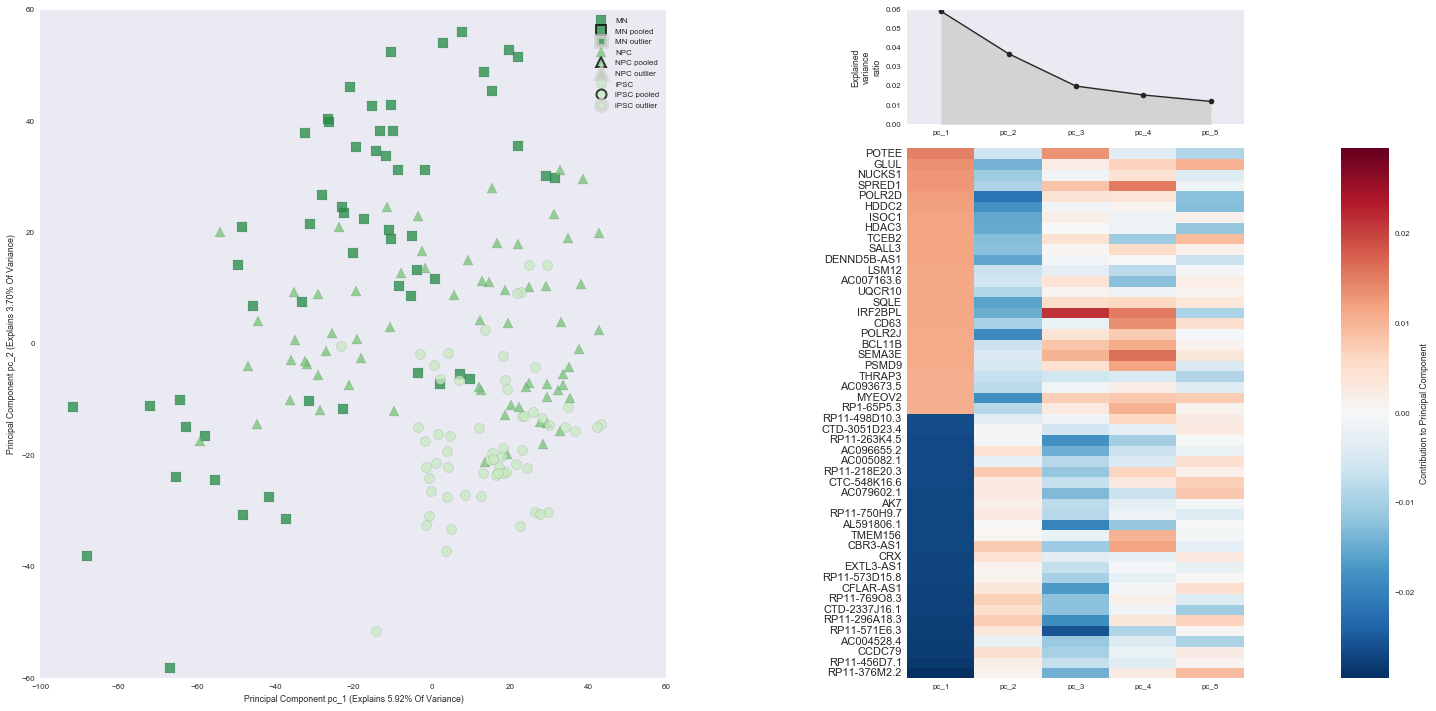

In [21]:
sns.set(style='dark', context='paper')

pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False, #show_point_labels=True,
                        sample_subset=singles_not_outliers_not_weird)

In [22]:
trait = 'MN_outlier'
trait_data = study.metadata.data[trait]
trait_data[trait_data]

M2_12    True
M6_07    True
Name: MN_outlier, dtype: bool

2016-05-13 08:48:51 Configuring predictor type: ExtraTreesClassifier with 18594 featuresFitting a predictor for X:MN_outlier_all_genes, y:MN_outlier, method:ExtraTreesClassifier... please wait.


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 930 out of 930 | elapsed:    0.5s finished


	Finished.


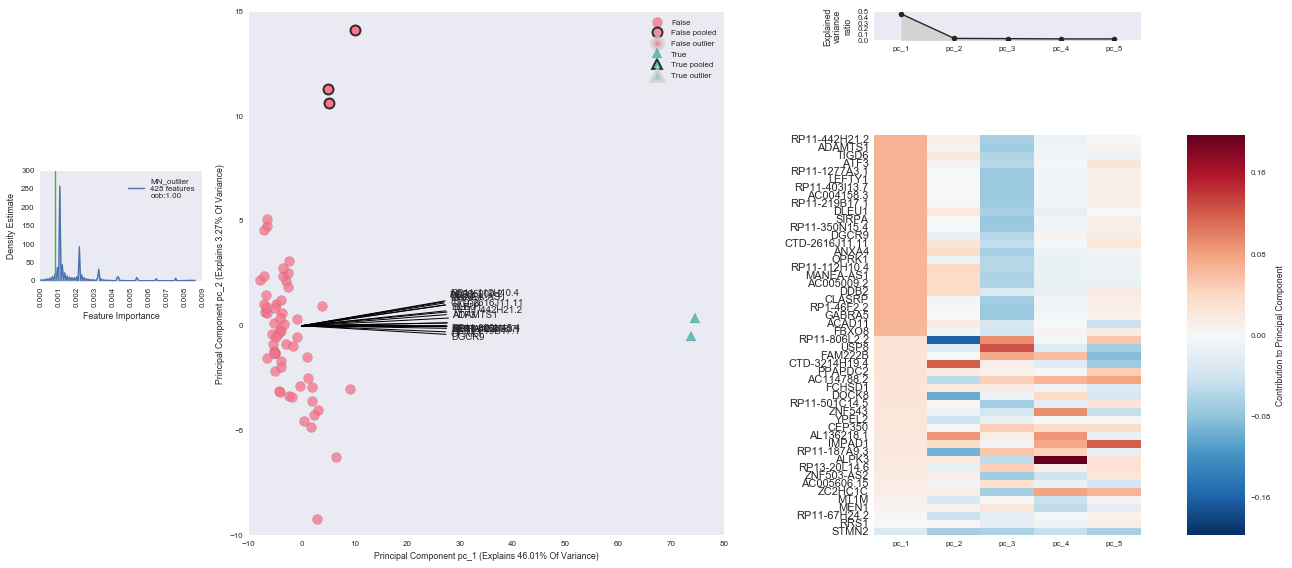

In [23]:
trait = 'MN_outlier'
trait_data = study.metadata.data[trait]
viz = study.expression.plot_classifier(trait_data, data_name='MN_outlier_all_genes', sample_ids=mn_single_not_outlier, 
                                 label_to_color=study.phenotype_to_color, groupby=study.sample_id_to_phenotype, 
                                 label_to_marker=study.phenotype_to_marker, order=study.phenotype_order)

In [24]:
important_features = viz.important_features_[viz.important_features_].index

In [25]:
from flotilla.compute.expression import differential_expression



from scipy import stats

statistical_test = stats.kruskal

groupby = trait_data

# data = study.expression.data.loc[mn_single_not_outlier, important_features]
data = study.expression.data
de_results = dict(
    (col, pd.Series(statistical_test(
        *[s for group, s in series.groupby(groupby)]),
        index=['statistic', 'p_value']))
    for col, series in data.iteritems())
de_results = pd.DataFrame.from_records(de_results).T
de_results['bonferonni_p_value'] = de_results.p_value*de_results.shape[0]
de_results = de_results.sort('bonferonni_p_value')
df = de_results.reset_index()
df = df.rename(columns={'index': 'gene_id'})

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [26]:
medians = data.groupby(groupby).median()
median_diff = medians.loc[True] - medians.loc[False]
median_diff.name = 'Difference in Medians'
median_diff.head()

ENSG00000000003    1.923549
ENSG00000000005    0.000000
ENSG00000000419    1.848942
ENSG00000000457    3.600574
ENSG00000000460    1.846867
Name: Difference in Medians, dtype: float64

In [27]:
df_diff = df.join(median_diff, on='gene_id')
df_diff.head()

,gene_id,statistic,p_value,bonferonni_p_value,Difference in Medians
0,ENSG00000128645,40.961490,1.552586e-10,0.000003,4.986731
1,ENSG00000226067,37.216388,1.057216e-09,0.000020,6.762326
2,ENSG00000229673,34.460600,4.349675e-09,0.000081,4.125228
3,ENSG00000256725,32.591453,1.137137e-08,0.000211,5.374002
4,ENSG00000156427,31.810804,1.699448e-08,0.000316,1.891254


In [28]:
df_diff['bigger_in_outliers'] = df_diff['Difference in Medians'] > 0
df_diff.head()

,gene_id,statistic,p_value,bonferonni_p_value,Difference in Medians,bigger_in_outliers
0,ENSG00000128645,40.961490,1.552586e-10,0.000003,4.986731,True
1,ENSG00000226067,37.216388,1.057216e-09,0.000020,6.762326,True
2,ENSG00000229673,34.460600,4.349675e-09,0.000081,4.125228,True
3,ENSG00000256725,32.591453,1.137137e-08,0.000211,5.374002,True
4,ENSG00000156427,31.810804,1.699448e-08,0.000316,1.891254,True


In [29]:
df_diff.groupby('bigger_in_outliers').size()

bigger_in_outliers
False     8096
True     10498
dtype: int64

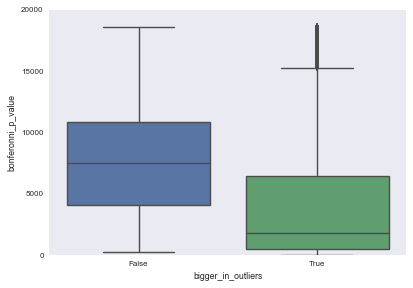

In [30]:
sns.boxplot(x='bigger_in_outliers', y='bonferonni_p_value', data=df_diff)

In [31]:
df_diff_gene_name = df_diff.join(study.expression.feature_data.gene_name, on='gene_id')
df_diff_gene_name.head()

,gene_id,statistic,p_value,bonferonni_p_value,Difference in Medians,bigger_in_outliers,gene_name
0,ENSG00000128645,40.961490,1.552586e-10,0.000003,4.986731,True,HOXD1
1,ENSG00000226067,37.216388,1.057216e-09,0.000020,6.762326,True,RP11-403I13.7
2,ENSG00000229673,34.460600,4.349675e-09,0.000081,4.125228,True,LL22NC01-116C6.1
3,ENSG00000256725,32.591453,1.137137e-08,0.000211,5.374002,True,RP11-662M24.2
4,ENSG00000156427,31.810804,1.699448e-08,0.000316,1.891254,True,FGF18


In [32]:
# data = study.expression.data.loc[mn_single_not_outlier, df.loc[df['greater_than_zero'], 'gene_id']]
# data = data.T
# data.index = study.expression.feature_data.loc[data.index, 'gene_name']
# g = sns.clustermap(np.log2(data), figsize=(6, 3))
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);

In [33]:
import six

In [34]:
subset = df_diff_gene_name.query('bigger_in_outliers & p_value < 1e-3')
six.print_(subset.shape)
subset.head()

(318, 7)


,gene_id,statistic,p_value,bonferonni_p_value,Difference in Medians,bigger_in_outliers,gene_name
0,ENSG00000128645,40.961490,1.552586e-10,0.000003,4.986731,True,HOXD1
1,ENSG00000226067,37.216388,1.057216e-09,0.000020,6.762326,True,RP11-403I13.7
2,ENSG00000229673,34.460600,4.349675e-09,0.000081,4.125228,True,LL22NC01-116C6.1
3,ENSG00000256725,32.591453,1.137137e-08,0.000211,5.374002,True,RP11-662M24.2
4,ENSG00000156427,31.810804,1.699448e-08,0.000316,1.891254,True,FGF18


In [35]:
'NUCKS' in subset['gene_name']

False

In [36]:
study.expression.data.loc[mn_single_not_outlier_not_weird, subset['gene_id']].head()

,ENSG00000128645,ENSG00000226067,ENSG00000229673,ENSG00000256725,ENSG00000156427,ENSG00000227888,ENSG00000229751,ENSG00000230325,ENSG00000119737,ENSG00000272923,...,ENSG00000260621,ENSG00000095397,ENSG00000204815,ENSG00000270581,ENSG00000146151,ENSG00000261770,ENSG00000267884,ENSG00000143552,ENSG00000243319,ENSG00000268735
M1_01,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,...,0.000000,0,0,0.000000,2.742584,0.000000,0.000000,0.000000,0.000000,0.000000
M1_02,1.003645,0,4.359542,0.000000,0.000000,0.651011,0,0.000000,0.000000,0.00000,...,0.000000,0,0,3.959446,0.000000,2.747435,0.427916,0.000000,2.639318,1.206987
M1_05,0.000000,0,0.000000,3.634709,0.000000,0.000000,0,0.000000,0.000000,0.00000,...,0.000000,0,0,0.000000,7.287685,0.000000,0.450642,0.000000,0.000000,0.000000
M1_06,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,3.773247,0.00000,...,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.557518
M1_07,0.000000,0,0.000000,0.000000,5.448805,0.000000,0,1.865012,0.000000,6.52906,...,4.142503,0,0,0.000000,0.000000,4.366518,0.000000,4.902691,0.000000,0.000000


In [37]:
study.expression.data.loc[weird_samples, subset['gene_id']]

,ENSG00000128645,ENSG00000226067,ENSG00000229673,ENSG00000256725,ENSG00000156427,ENSG00000227888,ENSG00000229751,ENSG00000230325,ENSG00000119737,ENSG00000272923,...,ENSG00000260621,ENSG00000095397,ENSG00000204815,ENSG00000270581,ENSG00000146151,ENSG00000261770,ENSG00000267884,ENSG00000143552,ENSG00000243319,ENSG00000268735
M2_12,4.912204,6.700023,4.162629,5.318693,2.033025,6.301504,1.092607,2.737258,4.216928,3.385428,...,2.434866,5.937429,5.853814,1.270511,2.596167,0.658886,0.334609,5.331107,3.766171,2.357552
M6_07,5.061258,6.824628,4.087828,5.429311,1.749483,6.349126,1.432617,3.260072,4.066193,3.164390,...,2.525954,5.793024,5.915910,2.211810,2.796770,0.679003,0.296112,5.359985,3.836156,2.246724


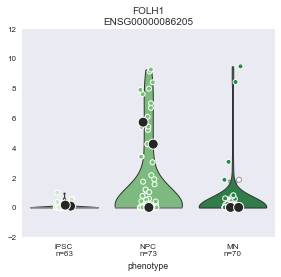

In [38]:
study.plot_gene('ENSG00000086205')

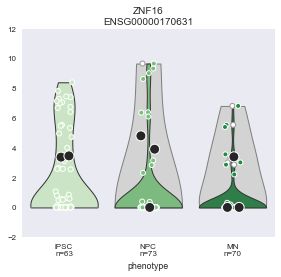

In [39]:
study.plot_gene("ENSG00000170631")

In [40]:
higher_in_weird = study.expression.data.loc[mn_single_not_outlier, subset['gene_id']]
higher_in_weird.head()

,ENSG00000128645,ENSG00000226067,ENSG00000229673,ENSG00000256725,ENSG00000156427,ENSG00000227888,ENSG00000229751,ENSG00000230325,ENSG00000119737,ENSG00000272923,...,ENSG00000260621,ENSG00000095397,ENSG00000204815,ENSG00000270581,ENSG00000146151,ENSG00000261770,ENSG00000267884,ENSG00000143552,ENSG00000243319,ENSG00000268735
M1_01,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.00000,...,0.000000,0,0,0.000000,2.742584,0.000000,0.000000,0.000000,0.000000,0.000000
M1_02,1.003645,0,4.359542,0.000000,0.000000,0.651011,0,0.000000,0.000000,0.00000,...,0.000000,0,0,3.959446,0.000000,2.747435,0.427916,0.000000,2.639318,1.206987
M1_05,0.000000,0,0.000000,3.634709,0.000000,0.000000,0,0.000000,0.000000,0.00000,...,0.000000,0,0,0.000000,7.287685,0.000000,0.450642,0.000000,0.000000,0.000000
M1_06,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,3.773247,0.00000,...,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.557518
M1_07,0.000000,0,0.000000,0.000000,5.448805,0.000000,0,1.865012,0.000000,6.52906,...,4.142503,0,0,0.000000,0.000000,4.366518,0.000000,4.902691,0.000000,0.000000


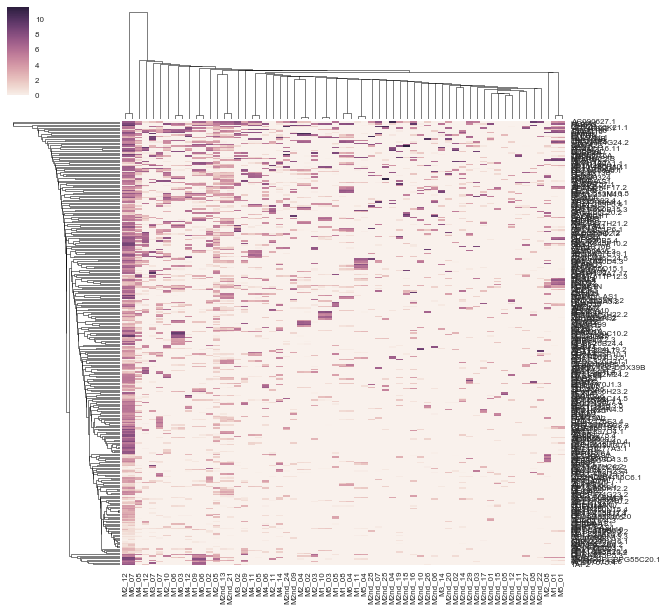

In [41]:
g = sns.clustermap(higher_in_weird.T, yticklabels=subset['gene_name'])
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);

In [42]:
go = study.go_enrichment(higher_in_weird.columns, df_diff_gene_name['gene_id'], min_feature_size=5, min_background_size=10)
go.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/data_model/gene_ontology.py:168: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  enrichment_df = enrichment_df.sort(columns=['p_value'])


,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0007605,"ENSG00000170615,ENSG00000160716,ENSG0000009539...","SLC26A5,CHRNB2,DFNB31,HOXA1,GRM7,CNTN5,DFNB59",biological_process,sensory perception of sound,78,7,124,0.000056,0.003946
GO:0008083,"ENSG00000119699,ENSG00000104432,ENSG0000024370...","TGFB3,IL7,LEFTY1,JAG2,FGF18",molecular_function,growth factor activity,82,5,173,0.002812,0.199685
GO:0005216,"ENSG00000183908,ENSG00000129159,ENSG0000008345...","LRRC55,KCNC1,P2RX5,CLCN2,SCN7A",molecular_function,ion channel activity,87,5,174,0.003779,0.268294
GO:0016791,"ENSG00000110786,ENSG00000054356,ENSG0000014436...","PTPN5,PTPRN,PHOSPHO2,DUSP26,PTPRU",molecular_function,phosphatase activity,97,5,128,0.006421,0.455875
GO:0006811,"ENSG00000083454,ENSG00000160716,ENSG0000014588...","P2RX5,CHRNB2,GLRA1,SLC12A6,SCN7A,SLC25A28,KCNC1",biological_process,ion transport,171,7,307,0.009334,0.662708


In [43]:
go.loc[go['go_domain'] == 'biological_process']

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0007605,"ENSG00000170615,ENSG00000160716,ENSG0000009539...","SLC26A5,CHRNB2,DFNB31,HOXA1,GRM7,CNTN5,DFNB59",biological_process,sensory perception of sound,78,7,124,0.000056,0.003946
GO:0006811,"ENSG00000083454,ENSG00000160716,ENSG0000014588...","P2RX5,CHRNB2,GLRA1,SLC12A6,SCN7A,SLC25A28,KCNC1",biological_process,ion transport,171,7,307,0.009334,0.662708
GO:0007268,"ENSG00000197971,ENSG00000168993,ENSG0000016071...","MBP,CPLX1,CHRNB2,SYN1,GLRA1,GRM7,CAMK2B,KCNC1",biological_process,synaptic transmission,249,8,409,0.027949,1.984397
GO:0006468,"ENSG00000105204,ENSG00000133597,ENSG0000011566...","DYRK1B,ADCK2,STK16,ALPK2,GAS6,KSR2,LIPE,TRIB3,...",biological_process,protein phosphorylation,501,13,648,0.050166,3.561753
GO:0035556,"ENSG00000239388,ENSG00000076344,ENSG0000011589...","ASB14,RGS11,PLCL1,RAPGEF4,KSR2,JAK2,MCF2",biological_process,intracellular signal transduction,237,7,320,0.051641,3.666513
GO:0045892,"ENSG00000143257,ENSG00000172216,ENSG0000016277...","NR1I3,CEBPB,ATF3,GAS6,TLE2,KAT8,TRIB3,BCL3,HEX...",biological_process,"negative regulation of transcription, DNA-depe...",368,10,496,0.052569,3.732376
GO:0030154,"ENSG00000171786,ENSG00000184916,ENSG0000009696...","NHLH1,JAG2,JAK2,PTPRU,SPATA9,ACSBG2,RBM11",biological_process,cell differentiation,255,7,461,0.072480,5.146051
GO:0007186,"ENSG00000076344,ENSG00000091428,ENSG0000014929...","RGS11,RAPGEF4,DRD2,JAK2,GPR75,GRM7",biological_process,G-protein coupled receptor signaling pathway,230,6,1079,0.100763,7.154198
GO:0007283,"ENSG00000164708,ENSG00000145757,ENSG0000013037...","PGAM2,SPATA9,ACSBG2,JAG2,ADAM28",biological_process,spermatogenesis,193,5,367,0.114366,8.119995
GO:0007399,"ENSG00000083454,ENSG00000105991,ENSG0000011017...","P2RX5,HOXA1,TRIM3,DPF3,DPF1,FGF18",biological_process,nervous system development,253,6,334,0.144286,10.244316


### PCA of constitutively expressed splicing events

### Get the splicing events

In [44]:
non_de_event_names = study.splicing.expression_to_splicing_id(non_de_genes)

### Plot PCA

In [45]:
study.metadata.data.columns

Index([u'single', u'pooled', u'phenotype', u'neuron', u'progenitor',
       u'stressed', u'craig_venter', u'differentiation_batch', u'split',
       u'outlier', u'MN_outlier'],
      dtype='object')

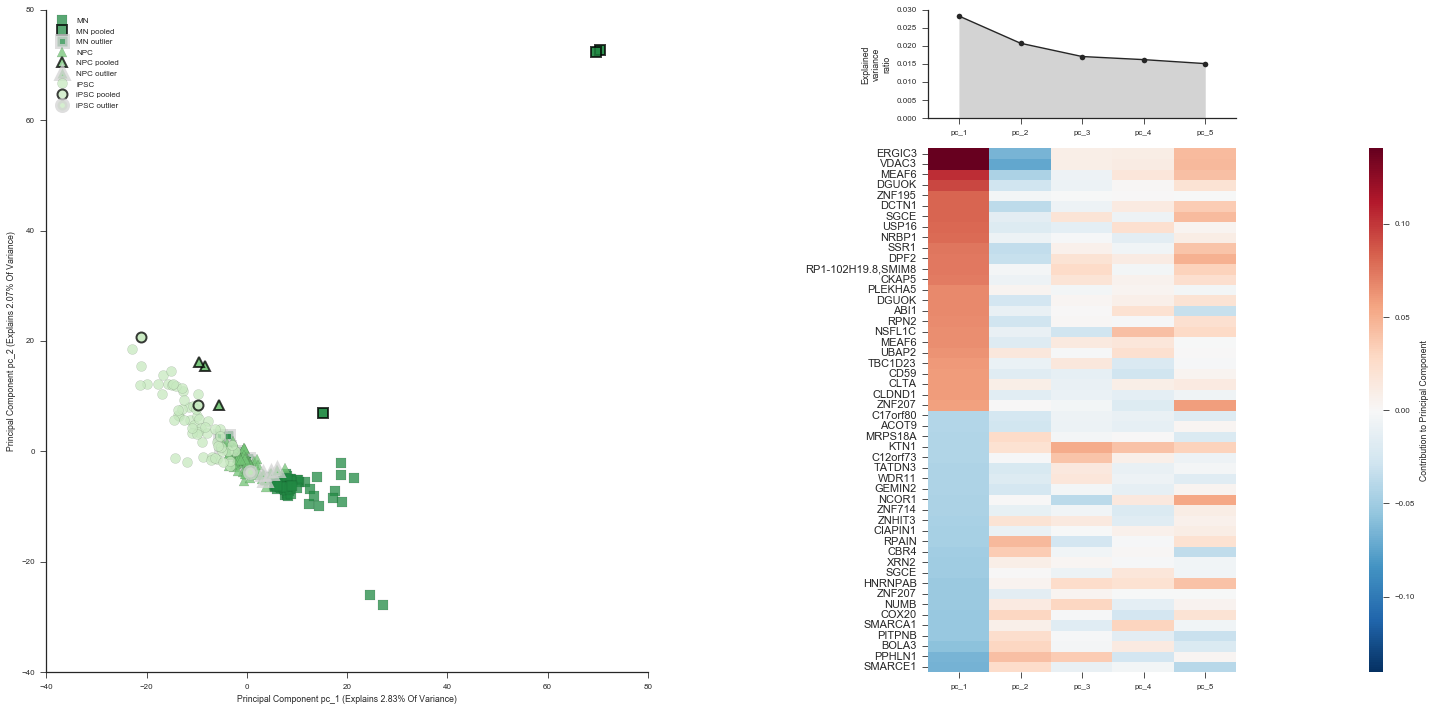

In [46]:
sns.set(style='ticks', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

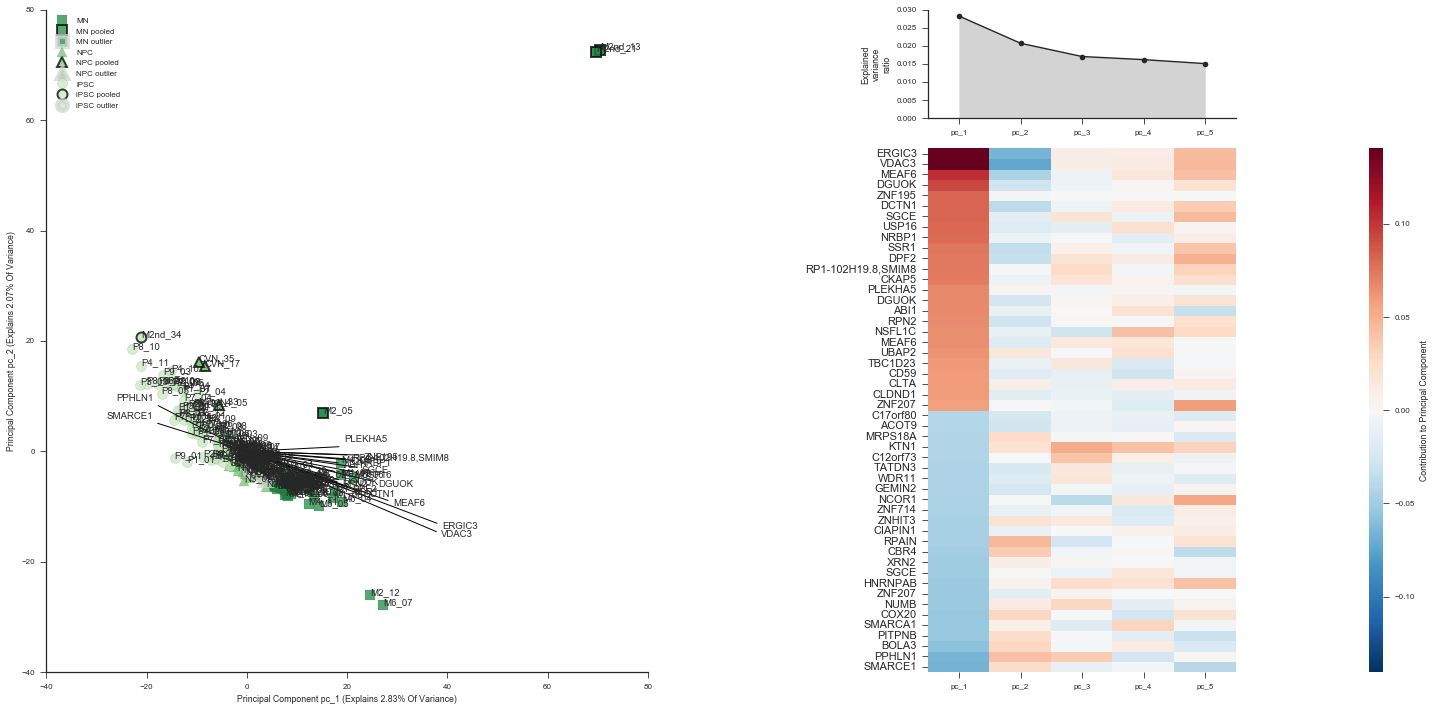

In [47]:
sns.set(style='ticks', context='paper')
study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', show_point_labels=True)

5501


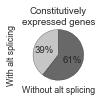

In [48]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[non_de_event_names].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = pd.Index(non_de_genes).difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(1.5, 1.5))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Greys', n_colors=2),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Constitutively\nexpressed genes')
fig.tight_layout()
fig.savefig('{}/constitutively_expressed_genes_percentage_genes_with_events.pdf'.format(folder))


### Number of splicing events in all expressed genes

5850


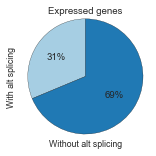

In [49]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = study.expression.data.columns.difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Expressed genes')
fig.tight_layout()
fig.savefig('{}/percentage_genes_with_events.pdf'.format(folder))


In [50]:
sns.set(style='ticks', context='paper')

In [51]:
tf_events = event_per_genes[study.expression.feature_subsets['gerstberge1014_tf']].dropna()
rbp_events = event_per_genes[study.expression.feature_subsets['gerstberge1014_rbp_target_mrna']].dropna()
lincrna_events = event_per_genes[study.expression.feature_subsets['transcript_type: lincRNA']].dropna()

all_genes_events = event_per_genes.reset_index()
all_genes_events['Gene Type'] = 'All genes'

tf_events = tf_events.reset_index()
tf_events['Gene Type'] = 'TF'

rbp_events = rbp_events.reset_index()
rbp_events['Gene Type'] = 'RBP'

lincrna_events = lincrna_events.reset_index()
lincrna_events['Gene Type'] = 'lincRNA'

events_per_gene_type = pd.concat([all_genes_events, tf_events, rbp_events, lincrna_events])
events_per_gene_type = events_per_gene_type.rename(columns={0:'AS exons per gene'})

fig, ax = plt.subplots(figsize=(2.25, 2))
sns.boxplot(x='Gene Type', y='AS exons per gene', data=events_per_gene_type, linewidth=1, color='grey')
sns.despine()
ax.locator_params('y', nbins=5)
# ax.set_ylim(0, 100)

from scipy.stats import mannwhitneyu
import itertools

grouped = events_per_gene_type.groupby('Gene Type')
groups = grouped.groups.keys()

comparisons = itertools.combinations(groups, 2)

col = 'AS exons per gene'

results = []
for group1, group2 in comparisons:
    test_statistic, p_value = mannwhitneyu(grouped.get_group(group1)[col], grouped.get_group(group2)[col])
    results.append([group1, group2, test_statistic, p_value])

columns = ['group1', 'group2', 'test_statistic', 'p_value']

mannwhitney_results = pd.DataFrame(results, columns=columns)
mannwhitney_results = mannwhitney_results.set_index(['group2', 'group1']).sort_index()
print mannwhitney_results.sort('p_value')
# ## Know that RBP-everything else is significant, so plot those
# others = ('All genes', 'TF', 'lincRNA')
# xticklabels = [x.get_text() for x in ax.get_xticklabels()]
# rbp_i = xticklabels.index('RBP')

# ymax = grouped[col].max().max()

# offset = 0
# yrange = ymax - grouped[col].min().min()
# offset_interval = yrange*0.1
# for i, other in enumerate(others):
#     offset = offset_interval*(i+1)
#     other_i = xticklabels.index(other)
#     ax.annotate("", xy=(rbp_i, ymax+offset), xycoords='data',
#                xytext=(other_i, ymax+offset), textcoords='data',
#                arrowprops=dict(arrowstyle="-", ec='#444444',
#                                connectionstyle="bar,fraction=0.08"))
#     middle = abs((rbp_i + other_i)/2.)
#     ax.text(middle, ymax + offset, '***',
#            horizontalalignment='center',
#            verticalalignment='center', fontsize=16)
# ax.set(xlabel='*** $p<10^{-10}$')
fig.tight_layout()
fig.savefig('{}/splicing_events_per_gene.pdf'.format(folder))

KeyError: 'gerstberge1014_tf'

## Venn Diagram of shared events

In [ ]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh10, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in study.splicing.data.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\10+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/shared_events_venn10_per_phenotype.pdf'.format(folder))

## Lavalamp plots

In [ ]:
study.splicing.data.shape

In [ ]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
print len(singles_no_outliers)

splicing_singles = study.splicing.data#.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
ten_per_celltype = (splicing_singles_count >= 10).any(axis=0)
splicing10 = study.splicing.data[ten_per_celltype[ten_per_celltype].index]
print splicing10.shape

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
fig, ax = plt.subplots(figsize=(2, 2))
plt.xscale('log', nonposx='clip')
sns.distplot(splicing10.values.flat, bins=np.linspace(0, 1,10), color='grey', kde=False, vertical=True)
ax.set(yticks=(0, 0.5, 1), ylabel='$\Psi$', xlabel='AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/splicing10_per_celltype_distplot.pdf'.format(folder))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 1.5))
flotilla.visualize.splicing.lavalamp(splicing10, color='grey', ax=ax, markersize=3)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/splicing10_per_celltype_lavalamp_all.png'.format(folder))

In [ ]:
splicin10.shape

In [ ]:
order = flotilla.compute.splicing.get_switchy_score_order(splicin10)

In [ ]:
pooled_grouped = study.splicing.pooled.groupby(study.sample_id_to_phenotype)

for phenotype, data in splicin10.groupby(study.sample_id_to_phenotype):
    fig, ax = plt.subplots(figsize=(4, 1.5))

    pooled = pooled_grouped.get_group(phenotype).loc[data.index]
    
    color = study.phenotype_to_color[phenotype]
    marker = study.phenotype_to_marker[phenotype]
    flotilla.visualize.splicing.lavalamp(data, color=color, marker=marker, ax=ax, markersize=3)
    flotilla.visualize.splicing.lavalamp(pooled, color=color, marker=marker, ax=ax, markeredgecolor='k', 
                                         markeredgewidth=1, alpha=1, markersize=3)
# fig = plt.gcf()
# fig.tight_layout()
# fig.savefig('{}/splicing10_per_celltype_lavalamp_all.png'.format(folder))

In [ ]:
# fig, (ax_lavalamp, ax_hist) = plt.subplots(ncols=2, figsize=(3.75, 1), sharey=True,
#                                            gridspec_kw=dict(width_ratios=(0.8, 0.2), wspace=0.05))

# flotilla.visualize.splicing.lavalamp(splicin10, color='grey', ax=ax_lavalamp)

# # Set the histogram axes as the current axes
# plt.sca(ax_hist)
# plt.xscale('log', nonposx='clip')
# sns.distplot(splicin10.values.flat, bins=np.linspace(0, 1, 10), color='grey', 
#              kde=False, vertical=True, ax=ax_hist)
# # ax_hist.set(yticks=[], ylabel='', xlabel='')
# sns.despine()
# # fig.tight_layout()
# fig.savefig('{}/splicing10_per_celltype_distplot_lavalamp.pdf'.format(folder), dpi=72)

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh10, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicin10.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\10+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/shared_events_venn10_per_phenotype.pdf'.format(folder))